<a href="https://colab.research.google.com/github/jodysuseno/praskripsi-research/blob/main/PraSkripsi_KNN_GA_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:


!pip install wget
import wget
url = "https://github.com/jodysuseno/praskripsi-research/raw/main/dataset/csv_result-chronic_kidney_disease_full.csv"
wget.download(url)


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=24c41f0835162a5ac7bfab25d6cb990d764eabdbe9c90f465e5b37aca5e52d70
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


'csv_result-chronic_kidney_disease_full.csv'

In [3]:
df = pd.read_csv("/content/csv_result-chronic_kidney_disease_full.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,"1,020",1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,"1,020",4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,"1,010",2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,"1,005",4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,"1,010",2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [4]:

df.drop(['id', 'sg','rbc','pc'], inplace=True, axis=1)


df.head()

,age,bp,al,su,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.0,0.0,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,4.0,0.0,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,2.0,3.0,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,4.0,0.0,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,2.0,0.0,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [5]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(df)

       Total  Percent
rbcc     131   0.3275
wbcc     106   0.2650
pot       88   0.2200
sod       87   0.2175
pcv       71   0.1775
hemo      52   0.1300
su        49   0.1225
al        46   0.1150
bgr       44   0.1100
bu        19   0.0475
sc        17   0.0425
bp        12   0.0300
age        9   0.0225
ba         4   0.0100
pcc        4   0.0100
dm         3   0.0075
cad        3   0.0075
ane        2   0.0050
htn        2   0.0050
appet      2   0.0050
pe         2   0.0050
class      1   0.0025


In [6]:
categorical_col, contin_val=[],[]

for i in df.columns:
    
    if df[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

['pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


In [7]:
df.nunique()

age       76
bp        10
al         6
su         6
pcc        2
ba         2
bgr      146
bu       118
sc        84
sod       34
pot       40
hemo     115
pcv       42
wbcc      89
rbcc      45
htn        2
dm         2
cad        2
appet      2
pe         2
ane        2
class      2
dtype: int64

In [8]:
df.isnull().sum()

age        9
bp        12
al        46
su        49
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         3
cad        3
appet      2
pe         2
ane        2
class      1
dtype: int64

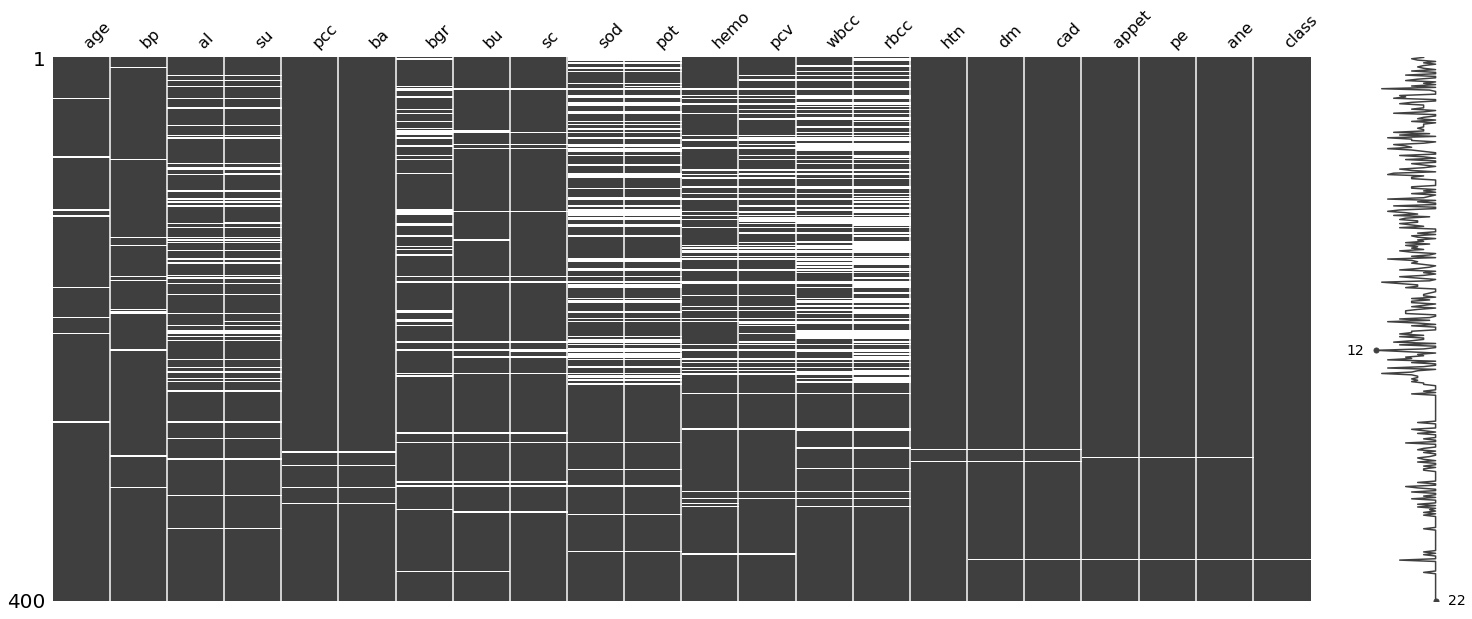

In [9]:
msno.matrix(df)

In [10]:

df['htn'] = df['htn'].map({'yes': 1, 'no': 0})
df['dm'] = df['dm'].map({'yes': 1, 'no': 0})
df['cad'] = df['cad'].map({'yes': 1, 'no': 0})
df['appet'] = df['appet'].map({'good': 1, 'poor': 0})
df['pe'] = df['pe'].map({'yes': 1, 'no': 0})
df['ane'] = df['ane'].map({'yes': 1, 'no': 0})
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})
df['pcc'] = df['pcc'].map({'present': 1, 'notpresent': 0})
df['ba'] = df['ba'].map({'present': 1, 'notpresent': 0})


df['age']=df['age'].fillna(df['age'].mean())
df['bp']=df['bp'].fillna(df['bp'].mean())
df['al']=df['al'].fillna(df['al'].mean())
df['su']=df['su'].fillna(df['su'].mean())
df['bgr']=df['bgr'].fillna(df['bgr'].mean())
df['bu']=df['bu'].fillna(df['bu'].mean())
df['sc']=df['sc'].fillna(df['sc'].mean())
df['sod']=df['sod'].fillna(df['sod'].mean())
df['pot']=df['pot'].fillna(df['pot'].mean())
df['hemo']=df['hemo'].fillna(df['hemo'].mean())
df['pcv']=df['pcv'].fillna(df['pcv'].mean())
df['wbcc']=df['wbcc'].fillna(df['wbcc'].mean())
df['rbcc']=df['rbcc'].fillna(df['rbcc'].mean())


df = df.dropna()

df.head()

,age,bp,al,su,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.0,0.0,0.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,4.0,0.0,0.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,2.0,3.0,0.0,0.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,4.0,0.0,1.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,2.0,0.0,0.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [11]:
df.isnull().sum()

age      0
bp       0
al       0
su       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [12]:
df.to_csv("/content/kidney_disease_preprocessed.csv")

In [13]:
#Menyeimbangkan data 
import os
from imblearn.over_sampling import SMOTE
from collections import Counter
os = SMOTE()
x, y = os.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])
count = Counter(y)
print(count)

Counter({1.0: 250, 0.0: 250})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Hasil Akurasi menggunakan K Neighbors Classifier : ", accuracy_score(y_test, y_pred)*100, "%")
ac_knn = accuracy_score(y_test, y_pred)*100
print()
print("Hasil F1 score Menggunakan K Neighbors Classifier :",f1_score(y_test, y_pred,)*100, "%")

Classification Report:
               precision    recall  f1-score   support

         0.0     0.7910    0.9815    0.8760        54
         1.0     0.9697    0.6957    0.8101        46

    accuracy                         0.8500       100
   macro avg     0.8804    0.8386    0.8431       100
weighted avg     0.8732    0.8500    0.8457       100

Hasil Akurasi menggunakan K Neighbors Classifier :  85.0 %

Hasil F1 score Menggunakan K Neighbors Classifier : 81.0126582278481 %


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knnAg = KNeighborsClassifier(n_neighbors=5)



In [17]:
# estimator = DecisionTreeClassifier()
!pip install sklearn-genetic
from genetic_selection import GeneticSelectionCV
model = GeneticSelectionCV(
    knnAg, cv=5, verbose=0,
    scoring="accuracy", max_features=5,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(x_train, y_train)
# print('Features:', X.columns[model.support_])


     |████████████████████████████████| 160 kB 7.3 MB/s 


In [18]:


# knnAg.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Hasil Akurasi menggunakan K Neighbors Classifier & AG : ", accuracy_score(y_test, y_pred)*100, "%")
ac_knn_ag = accuracy_score(y_test, y_pred)*100
print()
print("Hasil F1 score Menggunakan K Neighbors Classifier & AG :",f1_score(y_test, y_pred,)*100, "%")

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9434    0.9259    0.9346        54
         1.0     0.9149    0.9348    0.9247        46

    accuracy                         0.9300       100
   macro avg     0.9291    0.9304    0.9297       100
weighted avg     0.9303    0.9300    0.9300       100

Hasil Akurasi menggunakan K Neighbors Classifier & AG :  93.0 %

Hasil F1 score Menggunakan K Neighbors Classifier & AG : 92.4731182795699 %


In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

print("Hasil Akurasi menggunakan Naive Bayes : ", accuracy_score(y_test, y_pred)*100, "%")
ac_nb = accuracy_score(y_test, y_pred)*100
print()
print("Hasil F1 score Menggunakan Naive Bayes :",f1_score(y_test, y_pred,)*100, "%")

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9153    1.0000    0.9558        54
         1.0     1.0000    0.8913    0.9425        46

    accuracy                         0.9500       100
   macro avg     0.9576    0.9457    0.9491       100
weighted avg     0.9542    0.9500    0.9497       100

Hasil Akurasi menggunakan Naive Bayes :  95.0 %

Hasil F1 score Menggunakan Naive Bayes : 94.25287356321839 %


In [20]:
from sklearn.naive_bayes import GaussianNB
gnb_ag = GaussianNB()

In [21]:
!pip install sklearn-genetic
from genetic_selection import GeneticSelectionCV
modelAg = GeneticSelectionCV(
    gnb_ag, cv=5, verbose=0,
    scoring="accuracy", max_features=5,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
modelAg = modelAg.fit(x_train, y_train)

In [22]:
y_pred = modelAg.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Hasil Akurasi menggunakan K Neighbors Classifier & AG : ", accuracy_score(y_test, y_pred)*100, "%")
ac_gnb_ag = accuracy_score(y_test, y_pred)*100
print()
print("Hasil F1 score Menggunakan K Neighbors Classifier & AG :",f1_score(y_test, y_pred,)*100, "%")

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9818    1.0000    0.9908        54
         1.0     1.0000    0.9783    0.9890        46

    accuracy                         0.9900       100
   macro avg     0.9909    0.9891    0.9899       100
weighted avg     0.9902    0.9900    0.9900       100

Hasil Akurasi menggunakan K Neighbors Classifier & AG :  99.0 %

Hasil F1 score Menggunakan K Neighbors Classifier & AG : 98.9010989010989 %


        Method  accuracy
0          KNN      85.0
1  Naive Bayes      95.0
2     KNN & AG      93.0
3      NB & AG      99.0


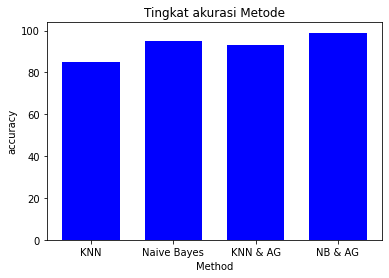

In [23]:
datavis = {
  "Method": ['KNN','Naive Bayes','KNN & AG', 'NB & AG'],
  "accuracy": [ac_knn,ac_nb,ac_knn_ag,ac_gnb_ag]
}
dfvis = pd.DataFrame(datavis)

print(dfvis) 

plt.bar([1,2,3,4], dfvis.accuracy, tick_label = dfvis.Method,
        width = 0.7, color = 'blue')
plt.xlabel('Method')
plt.ylabel('accuracy')
plt.title('Tingkat akurasi Metode')
plt.show()